In [27]:
import os
import pandas as pd
import numpy as np
import math
import re
import matplotlib.pyplot as plt

import graph_process

# Step 1. Data pre-processing.

* The dataset download URL is: https://www.kaggle.com/netflix-inc/netflix-prize-data/download, and should be saved into the './data/.csv' file.

In [29]:
DATASET_DIR = '/Users/xinsun/Dev_env/Graph-Network-Analysis-Recommendation/data_Netflix/' #'./data/'

DATA_1_TXT = 'combined_data_1.txt'
DATA_2_TXT = 'combined_data_2.txt'
DATA_CSV = 'trainingRatings.csv'

# load original sub-dataset
df1 = graph_process.data_load(DATASET_DIR, DATA_1_TXT)
df2 = graph_process.data_load(DATASET_DIR, DATA_2_TXT)

In [30]:
df1.head()

,movie_id,rating,date
0,1:,NaN,NaN
1,1488844,3.0,2005-09-06
2,822109,5.0,2005-05-13
3,885013,4.0,2005-10-19
4,30878,4.0,2005-12-26


In [7]:
df2.head()

,movie_id,rating,date
0,4500:,NaN,NaN
1,2532865,4.0,2005-07-26
2,573364,3.0,2005-06-20
3,1696725,3.0,2004-02-27
4,1253431,3.0,2004-03-31


In [3]:
df_1 = df1.loc[:25000]
df_2 = df2.loc[:25000]

customer_id_1 = df_1[df_1.rating.isnull()==True].index
customer_id_2 = df_2[df_2.rating.isnull()==True].index

In [4]:
# add customer id 
df_1 = graph_analysis.add_customer_id(df_1, customer_id_1)
df_2 = graph_analysis.add_customer_id(df_2, customer_id_2)

/Users/xinsun/anaconda3/envs/dev/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/xinsun/anaconda3/envs/dev/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/xinsun/Dev_env/Graph-Network-Analysis-Recommendation-/Netflix_Bipartite/graph_analysis.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [8]:
df_1.head(2)

,movie_id,rating,date,customer_id
0,1488844,3.0,2005-09-06,1
1,822109,5.0,2005-05-13,1


Dataset 1 shape: (24984, 4)
Dataset 2 shape: (24994, 4)
Full Dataset shape: (49978, 4)

 --- Complete Dataset example ---
      movie_id  rating        date customer_id
0      1488844     3.0  2005-09-06           1
1000   2085230     4.0  2004-03-15           3
2000   1321550     1.0  2003-09-10           3
3000   1810565     4.0  2005-06-23           5
4000    214166     2.0  2005-10-09           6
5000   1189445     1.0  2004-03-14           6
6000    298362     4.0  2005-07-11           8
7000   1545957     5.0  2005-04-06           8
8000   2179529     3.0  2005-04-18           8
9000    671612     3.0  2005-03-22           8
10000  2421394     3.0  2005-06-01           8
11000  1521774     4.0  2005-07-31           8
12000  1560390     3.0  2005-07-23           8
13000  1533679     5.0  2005-07-28           8
14000  1086213     5.0  2005-03-23           8
15000  2342811     3.0  2005-06-07           8
16000  1359442     3.0  2005-04-04           8
17000  1554408     1.0  2005-05-

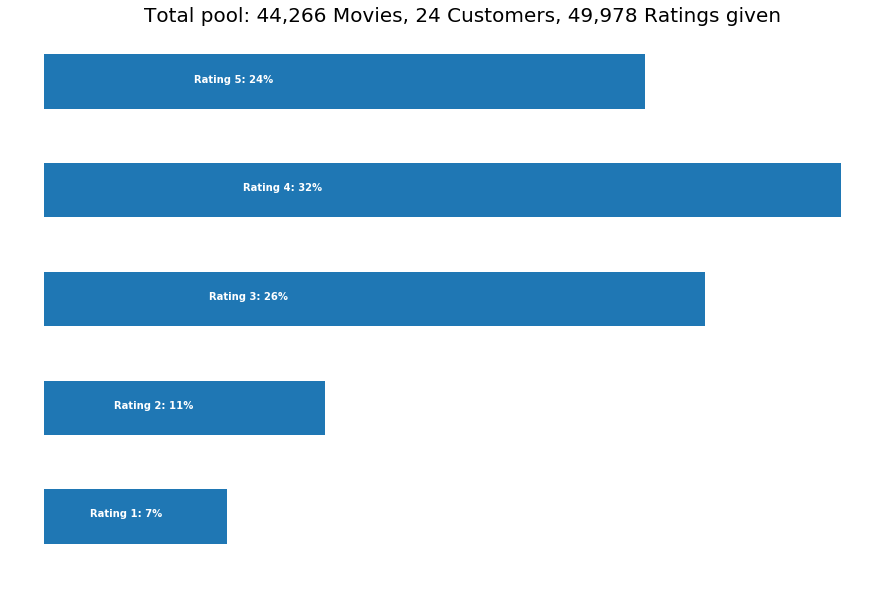

In [5]:
# concatenate the sub-dataset and plot the summary of data
df = graph_process.concatenate_plot_data(df_1, df_2)

In [6]:
# filter the original data to remove outliers 

df_filter, df_movie_summary, movie_benchmark, df_cust_summary, customer_benchmark= graph_process.filter_data(df)



 --- New Dataset examples ---
       customer_id  movie_id  rating        date
0                1   1488844     3.0  2005-09-06
1000             3   2085230     4.0  2004-03-15
2000             3   1321550     1.0  2003-09-10
3000             5   1810565     4.0  2005-06-23
4000             6    214166     2.0  2005-10-09
5000             6   1189445     1.0  2004-03-14
6000             8    298362     4.0  2005-07-11
7000             8   1545957     5.0  2005-04-06
8000             8   2179529     3.0  2005-04-18
9000             8    671612     3.0  2005-03-22
10000            8   2421394     3.0  2005-06-01
11000            8   1521774     4.0  2005-07-31
12000            8   1560390     3.0  2005-07-23
13000            8   1533679     5.0  2005-07-28
14000            8   1086213     5.0  2005-03-23
15000            8   2342811     3.0  2005-06-07
16000            8   1359442     3.0  2005-04-04
17000            8   1554408     1.0  2005-05-25
18000            8   1645904     3.0  

In [35]:
'''print(df_movie_summary)
print(movie_benchmark)
print(df_cust_summary)'''

print(drop_movie_list)
print(drop_customer_list)

Int64Index([], dtype='int64', name='movie_id')
Int64Index([1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 17, 4500, 4501, 4502,
            4504, 4505],
           dtype='int64', name='customer_id')


In [7]:
# save the processed dataset
graph_analysis.data_save(df_filter, DATA_CSV)


Starting save to .csv file
Saved to  trainingRatings.csv



# Step 2. Graph construction.

* We need to construct graph network based on processed data and to do network visualization

In [105]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import collections


DATA_file = '/Users/xinsun/Dev_env/Graph-Network-Analysis-Recommendation/data_Netflix/trainingRatings.csv'
df = pd.read_csv(DATA_file, sep=',')

In [106]:
df.head(2)

,customer_id,movie_id,rating,date,customer_emb_id,movie_emb_id
0,3,1025579,4.0,2003-03-29,2,1025578
1,3,712664,5.0,2004-02-01,2,712663


In [122]:
movie_review_count = df.groupby('movie_id').agg('count')

# only keep the movie which has more than 2 reviews
movie_keep = movie_review_count[movie_review_count.customer_id>4].index

df_filter = df[df['movie_id'].isin(movie_keep)].reset_index(drop=True)

In [123]:
print(len(df_filter.customer_id.unique()))
print(len(df_filter.movie_id.unique()))

8
19


In [124]:
node_list = list(df_filter.customer_id.unique()) + list(df_filter.movie_id.unique())
print(len(node_list))

edge_list = [(df_filter.loc[i, 'customer_id'], df_filter.loc[i, 'movie_id']) for i in range(len(df_filter))]
print(len(edge_list))

27
110


In [137]:
# now we start to construct the graph
G = nx.Graph()

# add nodes
G.add_nodes_from(node_list)

# add edges
G.add_edges_from(edge_list)


B = nx.Graph()

# Add nodes with the node attribute "bipartite"
B.add_nodes_from(list(df_filter.customer_id.unique()), bipartite=0)

B.add_nodes_from(list(df_filter.movie_id.unique()), bipartite=1)

# Add edges only between nodes of opposite node sets
B.add_edges_from(edge_list)

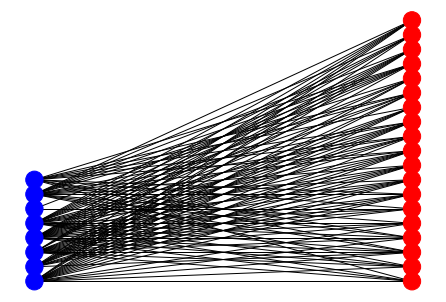

In [147]:
# Separate by group
l, r = nx.bipartite.sets(B)
pos = {}

# Update position for node from each group
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))

color = bipartite.color(B)

color_dict = {0:'b',1:'r'}

color_list = [color_dict[i[1]] for i in B.nodes.data('bipartite')]

nx.draw(B, pos=pos, with_labels=False, node_color = color_list)
plt.show()

In [148]:
print(G.number_of_nodes())
print(G.number_of_edges())

27
110


In [130]:
G.nodes

NodeView((3, 5, 6, 8, 16, 17, 4503, 4506, 603277, 1977959, 1478381, 2554745, 2596383, 1733406, 727242, 883478, 1272379, 1314869, 2237185, 1532433, 1819462, 2439493, 818752, 2457095, 277837, 1828803, 596255, 595870, 1830000, 2552319, 1664010, 1207990, 873713, 1935793, 2291306, 1317671, 1139925, 2606799, 1984315, 759737, 798296, 16272, 305344, 198000, 1403217, 2118461, 387418, 1932594, 794999, 1663888, 1461435, 575714, 371701, 1852040, 1784150, 1470123, 491531, 525356, 1301819, 2360906, 844028, 1001129, 2604976, 1447639, 2147714, 1829594, 2537543, 322009, 2297136, 2433610, 1753194))

In [117]:
print(list(G.adj[3]))  # or list(G.neighbors(1))

print(G.degree[3])  # the number of edges incident to 1

[603277, 1977959, 1478381, 2554745, 2596383, 1733406, 727242, 883478, 1272379, 1314869, 2237185, 1532433, 1819462, 2439493, 818752, 2457095, 277837, 1828803, 596255, 595870, 1830000, 2552319, 1664010, 1207990, 873713, 1935793, 2291306, 1317671, 1139925, 2606799, 1984315, 759737, 798296, 16272, 305344, 198000, 1403217, 2118461, 387418, 1932594, 794999, 1663888, 1461435, 575714, 371701, 1852040]
46


In [131]:
nx.connected_components(G)

<generator object connected_components at 0x12161ea98>

In [132]:
# degree of each node
#sorted(d for n, d in G.degree())

In [133]:
#nx.clustering(G)

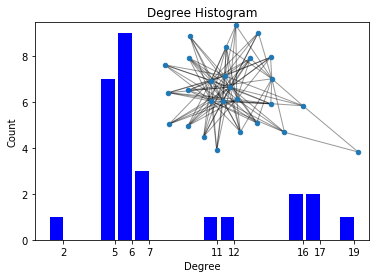

In [140]:
degree_sequence = sorted([d for n, d in B.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

## Step 3. Graph analysis.

* Edge weight distribution.
* Degree distribution.
* Cumulative degree distribution.
* Distance distribution.
* Clustering coefficients.
* Growth.
* Preferential attachment
* Random walk.


## Step 4. Clustering and Community detection.

## Step 5. Graph-based feature engineering & Embeddings.

## Step 6. Recommendation system construction.